In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import glob
from itertools import groupby
import matplotlib.pyplot as plt
from fastai import *
from fastai.vision import *
from google.colab import drive
import pandas as pd
import numpy as np
import collections

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import gridspec
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
# define a couple of constants
IMG_HEIGHT  = 224
IMG_WIDTH   = 224
BATCH_SIZE  = 32
EPOCHS      = 20
SEED        = 1234
strPath     = "/content/drive/MyDrive/Art/Images/Images"

In [5]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  strPath,
  validation_split = 0.2,
  subset     = "training",
  seed       = SEED,
  image_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = BATCH_SIZE)

Found 699 files belonging to 15 classes.
Using 560 files for training.


In [6]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  strPath,
  validation_split = 0.2,
  subset     = "validation",
  seed       = SEED,
  image_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = BATCH_SIZE)


Found 699 files belonging to 15 classes.
Using 139 files for validation.


In [7]:
# get the artists names
class_names = train_dataset .class_names

# define for later
num_classes = len(class_names)

print(class_names)

['Chandra Sarkar', 'DarkaakArts', 'Farjan Shahriar Abeg', 'Icecream Stick Art', 'Injamamul Adittya', 'Inksmith', 'Mahatab Rashid', 'Nishat Binte Monsur', 'Nycto', 'Salman Sakib', 'TarTin', 'Teabag Stories', 'The Bathroom Artist', 'The Panicked Architect', 'Zarin']


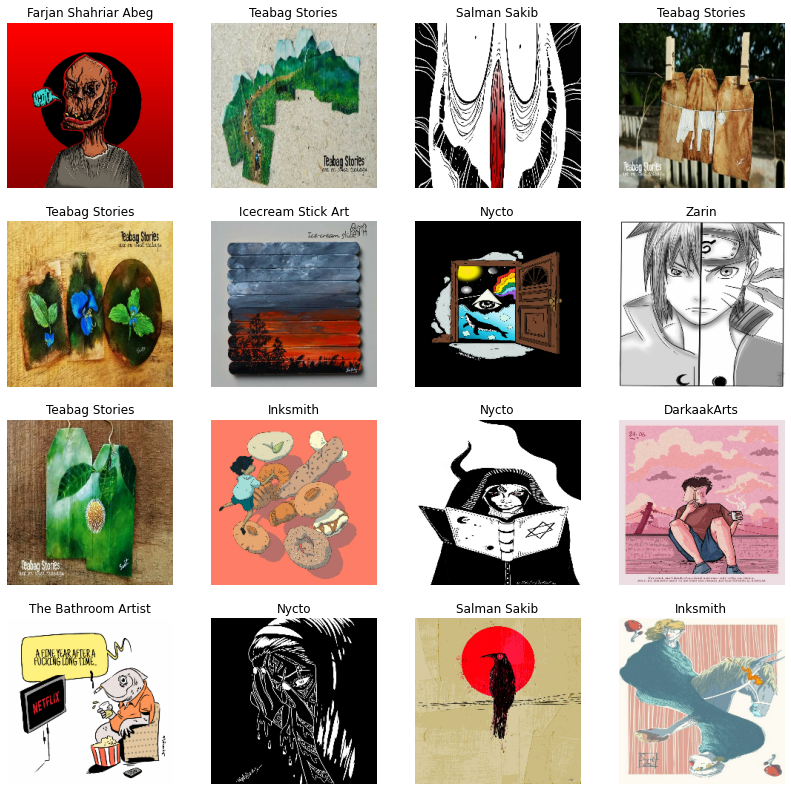

In [8]:
plt.figure(figsize=(14, 14))
for images, labels in train_dataset .take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [10]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 4
Number of test batches: 1


In [12]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [14]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [15]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.25),
    layers.experimental.preprocessing.RandomZoom(0.2), 
    layers.experimental.preprocessing.RandomTranslation(0.3,0.2), 
    layers.experimental.preprocessing.RandomContrast(0.2)
  ]
)

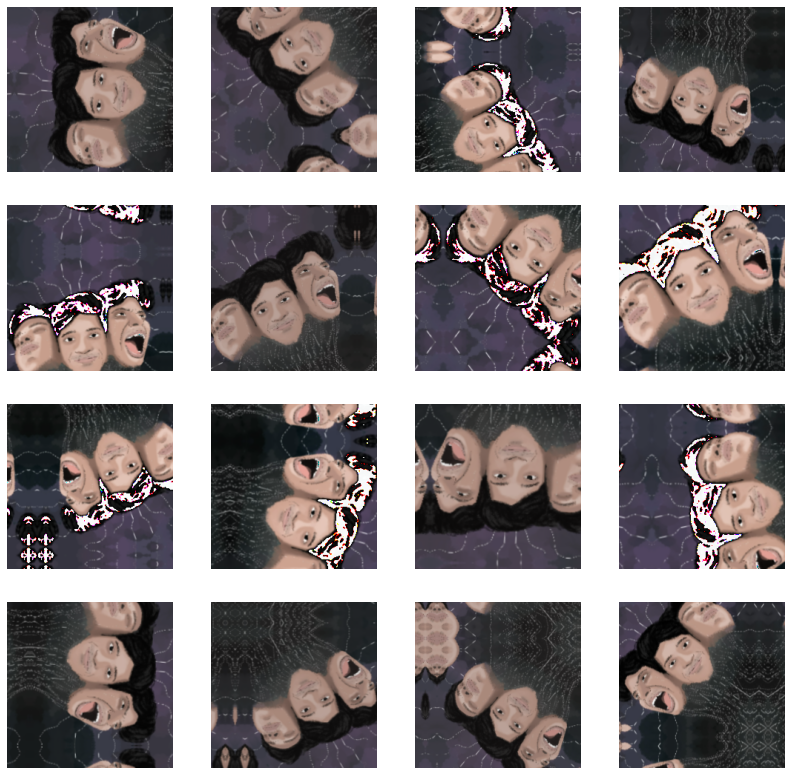

In [16]:
plt.figure(figsize=(14, 14))
for images, _ in train_dataset.take(1):
  for i in range(16):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [17]:

CONV = 3

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, CONV, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, CONV, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, CONV, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



In [18]:
#define model ingredients 
opti = tf.keras.optimizers.RMSprop(momentum=0.1) 
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 
metr = ['accuracy']

#compile model 
model.compile(optimizer = opti, 
              loss = loss, 
              metrics = metr)

In [19]:

history = model.fit(
  train_dataset,
  validation_data = validation_dataset,
  epochs          = EPOCHS
)

Epoch 1/20
18/18 [==============================] - 96s 5s/step - loss: 5.2858 - accuracy: 0.1103 - val_loss: 2.5008 - val_accuracy: 0.2430
Epoch 2/20
18/18 [==============================] - 44s 2s/step - loss: 2.5448 - accuracy: 0.2221 - val_loss: 2.4208 - val_accuracy: 0.2710
Epoch 3/20
18/18 [==============================] - 45s 2s/step - loss: 2.4940 - accuracy: 0.2040 - val_loss: 2.6554 - val_accuracy: 0.1402
Epoch 4/20
18/18 [==============================] - 44s 2s/step - loss: 2.4766 - accuracy: 0.2353 - val_loss: 2.8067 - val_accuracy: 0.2804
Epoch 5/20
18/18 [==============================] - 44s 2s/step - loss: 2.4606 - accuracy: 0.2447 - val_loss: 2.5700 - val_accuracy: 0.1028
Epoch 6/20
18/18 [==============================] - 44s 2s/step - loss: 2.2434 - accuracy: 0.2838 - val_loss: 2.0851 - val_accuracy: 0.3832
Epoch 7/20
18/18 [==============================] - 46s 2s/step - loss: 2.2996 - accuracy: 0.2822 - val_loss: 2.0148 - val_accuracy: 0.3645
Epoch 8/20
18/18 [==

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)       

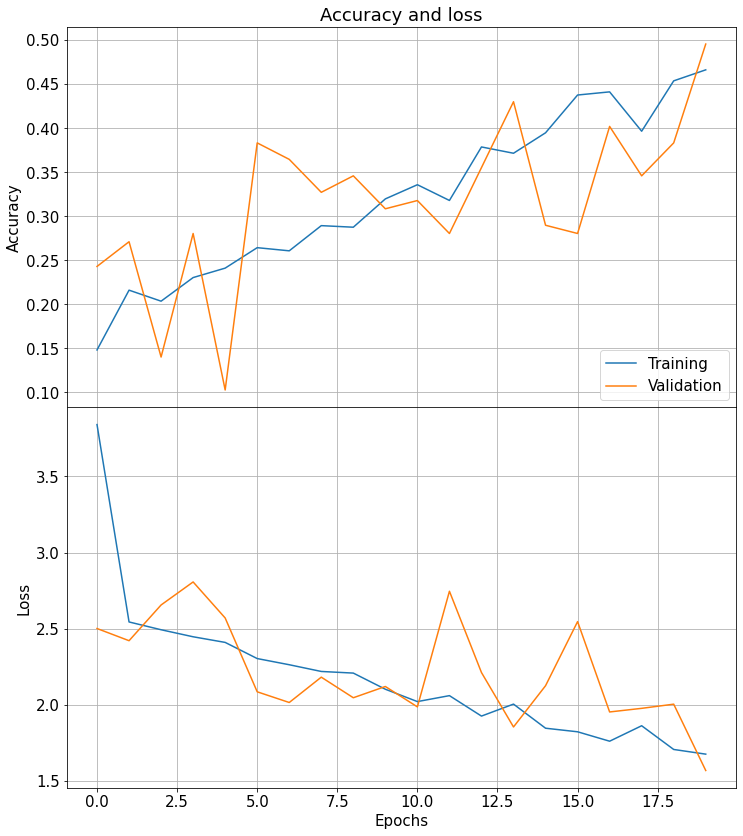

In [21]:
# get the values
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']


# show the results
epochs_range = range(EPOCHS)


plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(12, 14))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 

ax0 = plt.subplot(gs[0])
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='lower right')
plt.title('Accuracy and loss')
plt.ylabel("Accuracy")
plt.grid(True)

ax1 = plt.subplot(gs[1], sharex = ax0)
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid(True)

plt.subplots_adjust(hspace=.0)
plt.show()

In [23]:
#save??????
#modelDirectory = r'resources\smart_face_mask_detector.model'
modelDirectory = "/content/drive/MyDrive/Art/baseline-cnn-model.model"
model.save(modelDirectory, save_format="h5")

In [24]:
#load_saved_model
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Art/baseline-cnn-model.model')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)       